In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re

In [2]:
path = 'a2_data.xlsx'

### Data process

#### mange product data
Dimension 'Release Date' showed unreadable data, we convert it into the format 'Year-Month-Day'.

In [3]:
# show product data
df_product = pd.read_excel(path,sheet_name='Normalized Product Data')
df_product['Release Year'] = df_product['Release Year'].apply(lambda x: int(str(x)[:4]))
df_product['Model ID'] = df_product['Model ID'].apply(lambda x: int(x))

df_product = df_product.drop_duplicates()
print(df_product.shape)
print(len(set(list(df_product['Model']))))

(3162, 16)
3162


Try to find whether there is duplicated data. Remove all symbols in 'Model' and convert them into lower case.

In [4]:
# analyse duplicates
df_product_copy = df_product.copy()
df_product_copy['Model'] = df_product_copy['Model'].apply(lambda x: re.sub('[^A-Za-z0-9]+', '',x).lower())
print(len(df_product_copy))
print(len(set(list(df_product_copy['Model']))))

3162
3155


Find duplicated data and get their model id. We only kept one row of record.

In [5]:
# find duplicate model id
duplicates1 = []
for index,value in dict(Counter(list(df_product_copy['Model']))).items():
    if value!=1:
        duplicates1.append(list(df_product_copy[df_product_copy['Model']==index]['Model ID']))
#         print(df_model_company_test[df_model_company_test['Model']==index]['Model ID'])
delete_model_id1 = [row[0] for row in duplicates1]
print(delete_model_id1)
# for num in delete_model_id1:
df_product=df_product[~df_product['Model ID'].isin(delete_model_id1)]
df_product = df_product.dropna()
print(df_product.shape)
print(df_product.columns)

[1014, 1419, 1462, 1974, 1977, 2422, 2879]
(3155, 16)
Index(['Model', 'Release Date', 'Release Year', 'Model ID',
       'RAM Capacity (Mb)', 'Storage (Mb)', 'CPU Clock (MHz)',
       'Display Diagonal (in)', 'Display Width(px)', 'Display Length(px)',
       'Width (mm)', 'Length (mm)', 'Depth (mm)', 'Volume (cubic cm)',
       'Mass (grams)', 'Pixel Density (per inch)'],
      dtype='object')


In order to obtain the popular titles of various companies, some processing is required. We found that the company is at the top of the product name, so we took it out and used it as a new column for later processing.

In [6]:
company_name_list=[]
for index, row in df_product.iterrows():
    tmp_list = row['Model'].split()
    if tmp_list[1]=='Ericsson':
        company_name_list.append('Sony Ericsson')
    else:
        company_name_list.append(row['Model'].split()[0])
df_product['Company'] = company_name_list
print(df_product.shape)
print(df_product.columns)

(3155, 17)
Index(['Model', 'Release Date', 'Release Year', 'Model ID',
       'RAM Capacity (Mb)', 'Storage (Mb)', 'CPU Clock (MHz)',
       'Display Diagonal (in)', 'Display Width(px)', 'Display Length(px)',
       'Width (mm)', 'Length (mm)', 'Depth (mm)', 'Volume (cubic cm)',
       'Mass (grams)', 'Pixel Density (per inch)', 'Company'],
      dtype='object')


#### Manage  company data

After reading this table, select the desired column.

In [9]:
# show Company ID
# select Company_real and drop duplicates to assure oe id to one company
df_company = pd.read_excel(path,sheet_name='Company ID').dropna()[['Company','Company_real']]

df_company = df_company.drop_duplicates()
print(df_company.shape)
df_company.head()

(213, 2)


,Company,Company_real
1,1und1,United Internet
3,3Com,3Com
5,Abocom,AboCom Systems
7,Acer,Acer
9,Ainol,"Shenzhen Ainol Electronics Co., Ltd"


Store the relationship between the abbreviation and the audience in the dictionary.

In [10]:
company_name_dict={}
for index, row in df_company.iterrows():
    company_name_dict[row['Company']] = row['Company_real']

### Final table

In [11]:
df_product['Company_real'] = df_product['Company'].apply(lambda x: company_name_dict[x] )
df_product.head()
print(df_product.columns)

Index(['Model', 'Release Date', 'Release Year', 'Model ID',
       'RAM Capacity (Mb)', 'Storage (Mb)', 'CPU Clock (MHz)',
       'Display Diagonal (in)', 'Display Width(px)', 'Display Length(px)',
       'Width (mm)', 'Length (mm)', 'Depth (mm)', 'Volume (cubic cm)',
       'Mass (grams)', 'Pixel Density (per inch)', 'Company', 'Company_real'],
      dtype='object')


In [13]:
df_product.to_csv('for_show/final.csv')

### Q2: Which companies tried to lead the new markets with the new types of mobile device? 

In order to find companies that are trying to lead new markets through new mobile devices, one can analyze from two perspectives, one is the new technology leading the new market, and the other is the number of new products launched during the cycle.
First, analyze the number of new products launched by each company each year. Choose a company that launches the most new products every year from 1989 to 2012. Therefore, by analyzing how many times each company has appeared each year, you can indirectly understand how many products it has launched each year. 

In [217]:
from collections import Counter
da_m_select = df_product[['Release Year','Company_real']]
year_list = list(set(list(da_m_select['Release Year'])))
whole_result=[]
for year in year_list:
    count_dict = dict(Counter(list(da_m_select[da_m_select['Release Year']==year].Company_real)))
    count_dict = sorted(count_dict.items(), key=lambda count_dict:count_dict[1], reverse=True)
    if len(count_dict)>=1:
        for row in count_dict[:1]:
            whole_result.append([year,row[0],row[1]])
    else:
        for row in count_dict:
            whole_result.append([year,row[0],row[1]])

df_result1 = pd.DataFrame(whole_result,columns=['year','company','num'])
# df_result1.to_csv('result1.csv')


In this way, a bar graph is obtained. The abscissa represents the number of products launched by the company each year, and the ordinate represents the year. The depth of the color represents the size of the quantity, and the darker the color, the larger the quantity. The name of the company is written as a label on the right side of the bar. In this way, we can clearly see which companies are committed to launching new products from 1989 to 2012. Next, an analysis will be performed on the results in the figure. 

During the ten years from 1989 to 1999, Hewlett-Packard performed very well. The number of products released every year is constantly increasing. In the two years from 2000 to 2002, Japanese companies such as Sony Corporation and Casio occupied a large area, and nearly 10 new products were put on sale every year. HTC had quite an amazing performance from 2003 to 2009. Between 2006 and 2007, the number of products released reached its peak. Finally, in the next ten years, the number of new products released by South Korean company Samsung each year has exploded. In 2012, the number was even three times that of 2010, exceeding 110 new products.

From this picture, from the perspective of the number of products released each year, it is not difficult to see that in the first ten years (1989-1999), Hewlett-Packard was the well-deserved market leader, and in the next ten years (2000-2010), HTC strives to do the best in launching new products. After 2010, Samsung announced its ambitions to guide the market with an overwhelming number of products.


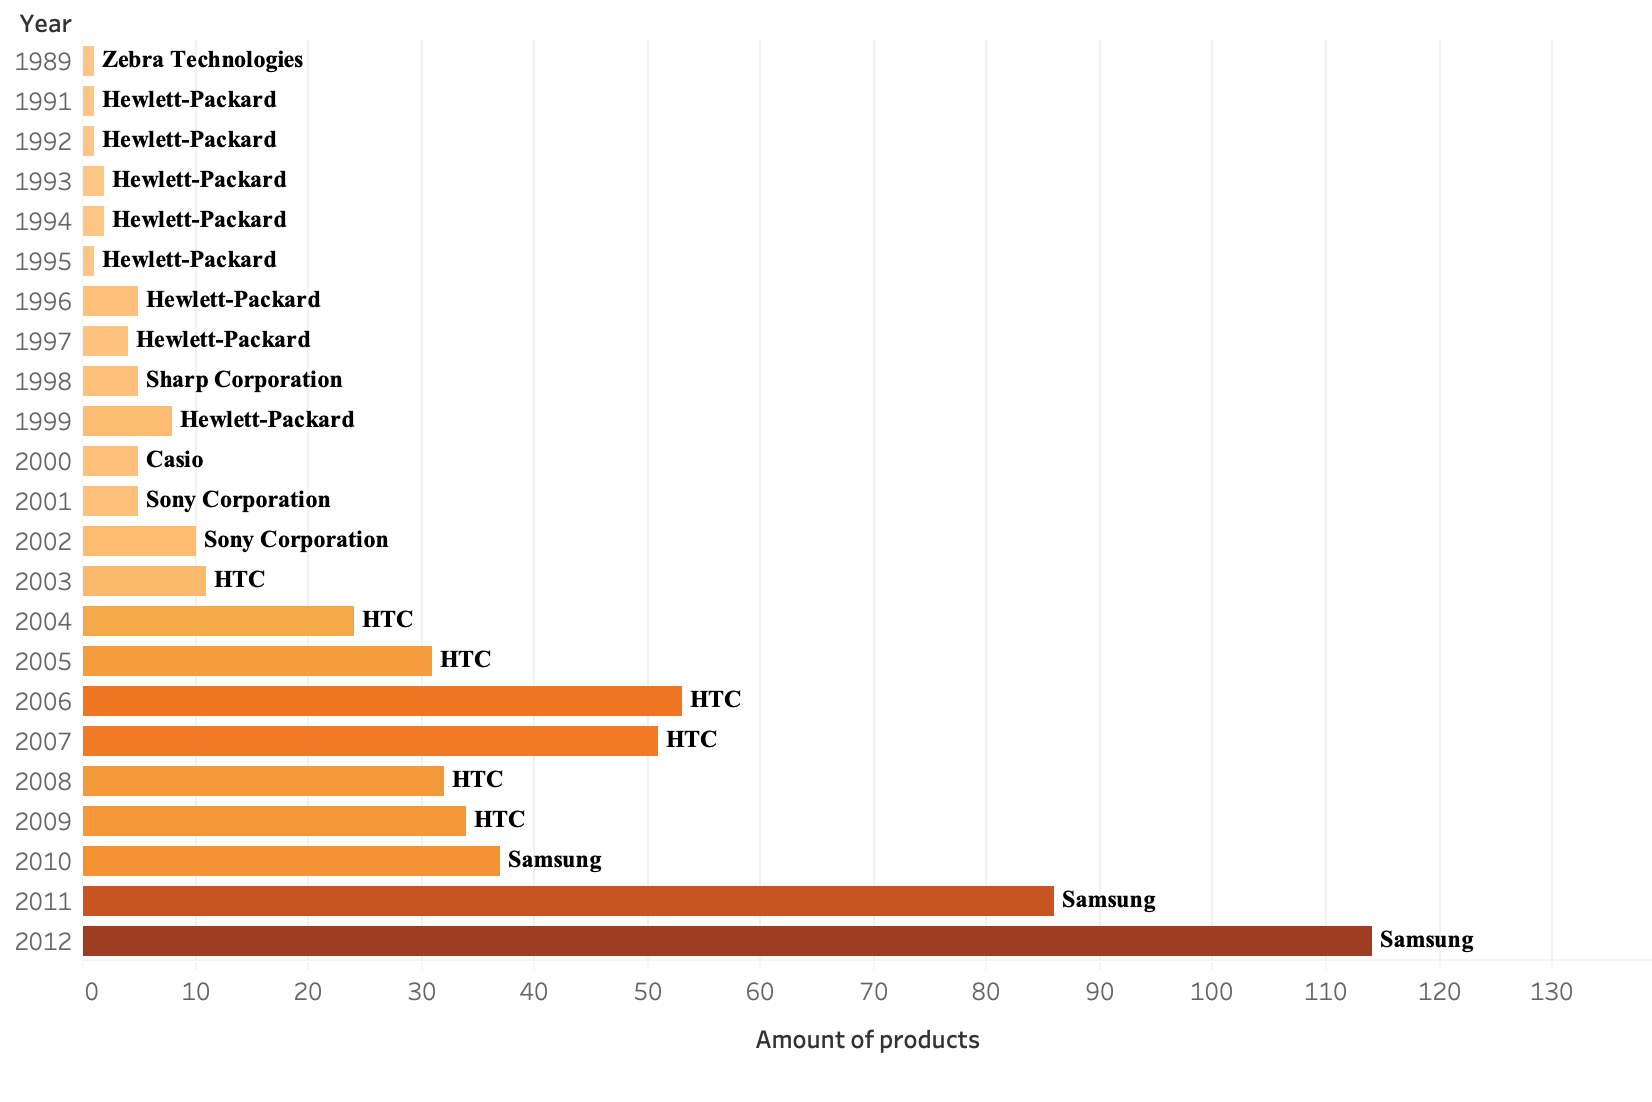

However, sometimes leading the market is not just a large number of new products, but a revolutionary new technology. So the next step will be to analyze this problem from a technical point of view. There are many hardware-related data in the provided data, which can be used for analysis, such as cpu, memory, screen-to-body ratio, etc.
In order to answer this question, some analysis of the features is required.

RAM Capacity: RAM is "random access memory". The speed and performance of the system are directly related to the RAM. That means the larger RAM, the system runs faster.

Storage: Storage is an integral part of the computer, users can store and access data for a long time. Larger storage can store more files.

CPU Clock: Generally, a higher clock speed means a faster CPU. However, there are many other factors at play.

Display Diagonal (in): The size of the screen is usually described by the length of the diagonal, that is, the distance between the diagonals, usually in inches. The larger the bigger.

Display Length (px): The length of the screen in pixel.

Width (mm),Length (mm),Depth (mm): The physical size of the device.

Volume (cubic cm): The volume of a device.

Mass (grams): The weight of a device.

Pixel Density (per inch): Pixel density is a calculation that returns the number of physical pixels per inch on a screen or display of a device. High density means better images, better fonts, smoother lines, or in other words, higher quality.

After knowing what these features represent, some of the more valuable features can be chosen for analysis instead of selecting all of them. The evaluation can be based on these features: 'RAM Capacity', 'CPU Clock', these two features indicate the computing power of the mobile device, and the computing power of the device is a manifestation of whether the device is advanced. Feature 'Storage' only represents the size of storage space. Since many devices have different memory sizes, but their computing speed is the same, feature 'Storage' won't be considered as an evaluation feature. Another trend of mobile devices is that the screen will become larger and the pixels will get better and better, so we will use 'Display Diagonal (in)' and 'Pixel Density (per inch)' to analyze the size and pixels of the screen. 

Now we need to compute the new feature.

In [31]:
final_csv_path = 'for_show/final.csv'
df_final = pd.read_csv(final_csv_path,index_col=0)
# print(df_final.columns)
df_final = df_final[['Release Year', 'RAM Capacity (Mb)','CPU Clock (MHz)','Display Diagonal (in)', 'Pixel Density (per inch)', 'Company_real']]  
# df_final.head()

In [161]:
# RAM Capacity (Mb)
def_ram = df_final[['Release Year', 'RAM Capacity (Mb)', 'Company_real']]
def_ram_group = def_ram.groupby('Release Year')[['RAM Capacity (Mb)','Company_real']].apply(lambda t: t[t['RAM Capacity (Mb)']==t['RAM Capacity (Mb)'].max()])

ram_list = [[index[0], row['RAM Capacity (Mb)'], row['Company_real']] for index,row in def_ram_group.iterrows()]
def_ram_max = pd.DataFrame(ram_list,columns=['Year','RAM','Company'])


In [218]:
da_ram_select = def_ram_max[['Year','Company']]
year_list = list(set(list(da_ram_select['Year'])))
whole_result2=[]
for year in year_list:
    count_dict = dict(Counter(list(da_ram_select[da_ram_select['Year']==year].Company)))
    count_dict = sorted(count_dict.items(), key=lambda count_dict:count_dict[1], reverse=True)
    if len(count_dict)>=1:
        for row in count_dict[:1]:
            whole_result2.append([year,row[0],row[1]])
    else:
        for row in count_dict:
            whole_result2.append([year,row[0],row[1]])

df_result2 = pd.DataFrame(whole_result2,columns=['year','company','times'])
# df_result2.to_csv('for_show/result2.csv')


From these data, a bar chart can be drawn, and the x-axis represents the year. For the RAM data is normalized, the specific data cannot be displayed. So the idea is to look for the company that launches the largest RAM product every year. Sometimes these companies will appear many times, so the y-axis is the number of products that launch the largest RAM each year. The length of the bar represents the quantity, and there is a number label at the top. Each color corresponds to a company. Between 1989 and 1999, Hewlett-Packard apparently appeared many times. But there are also companies such as Apple Inc, Nokia Corporation, NEC Corporationæ, etc. Between 2000 and 2010, most companies have made progress in launching larger RAM products over the previous decade. For example, Casio and Zebra Technologies launched four large RAM levels in 2000 and 2007 respectively. Roper Technologies launched 6 models in 2006. However, these can't compete with HTC. Half of the ten years, HTC ranked first. From 2011 to 2012, Samsung undisputedly became the number one, and its performance was very eye-catching. From the perspective of RAM, Hewlett-Packard, HTC and Samsung led the market from 1989 to 1999, 2000 to 2010 and after 2021, respectively.

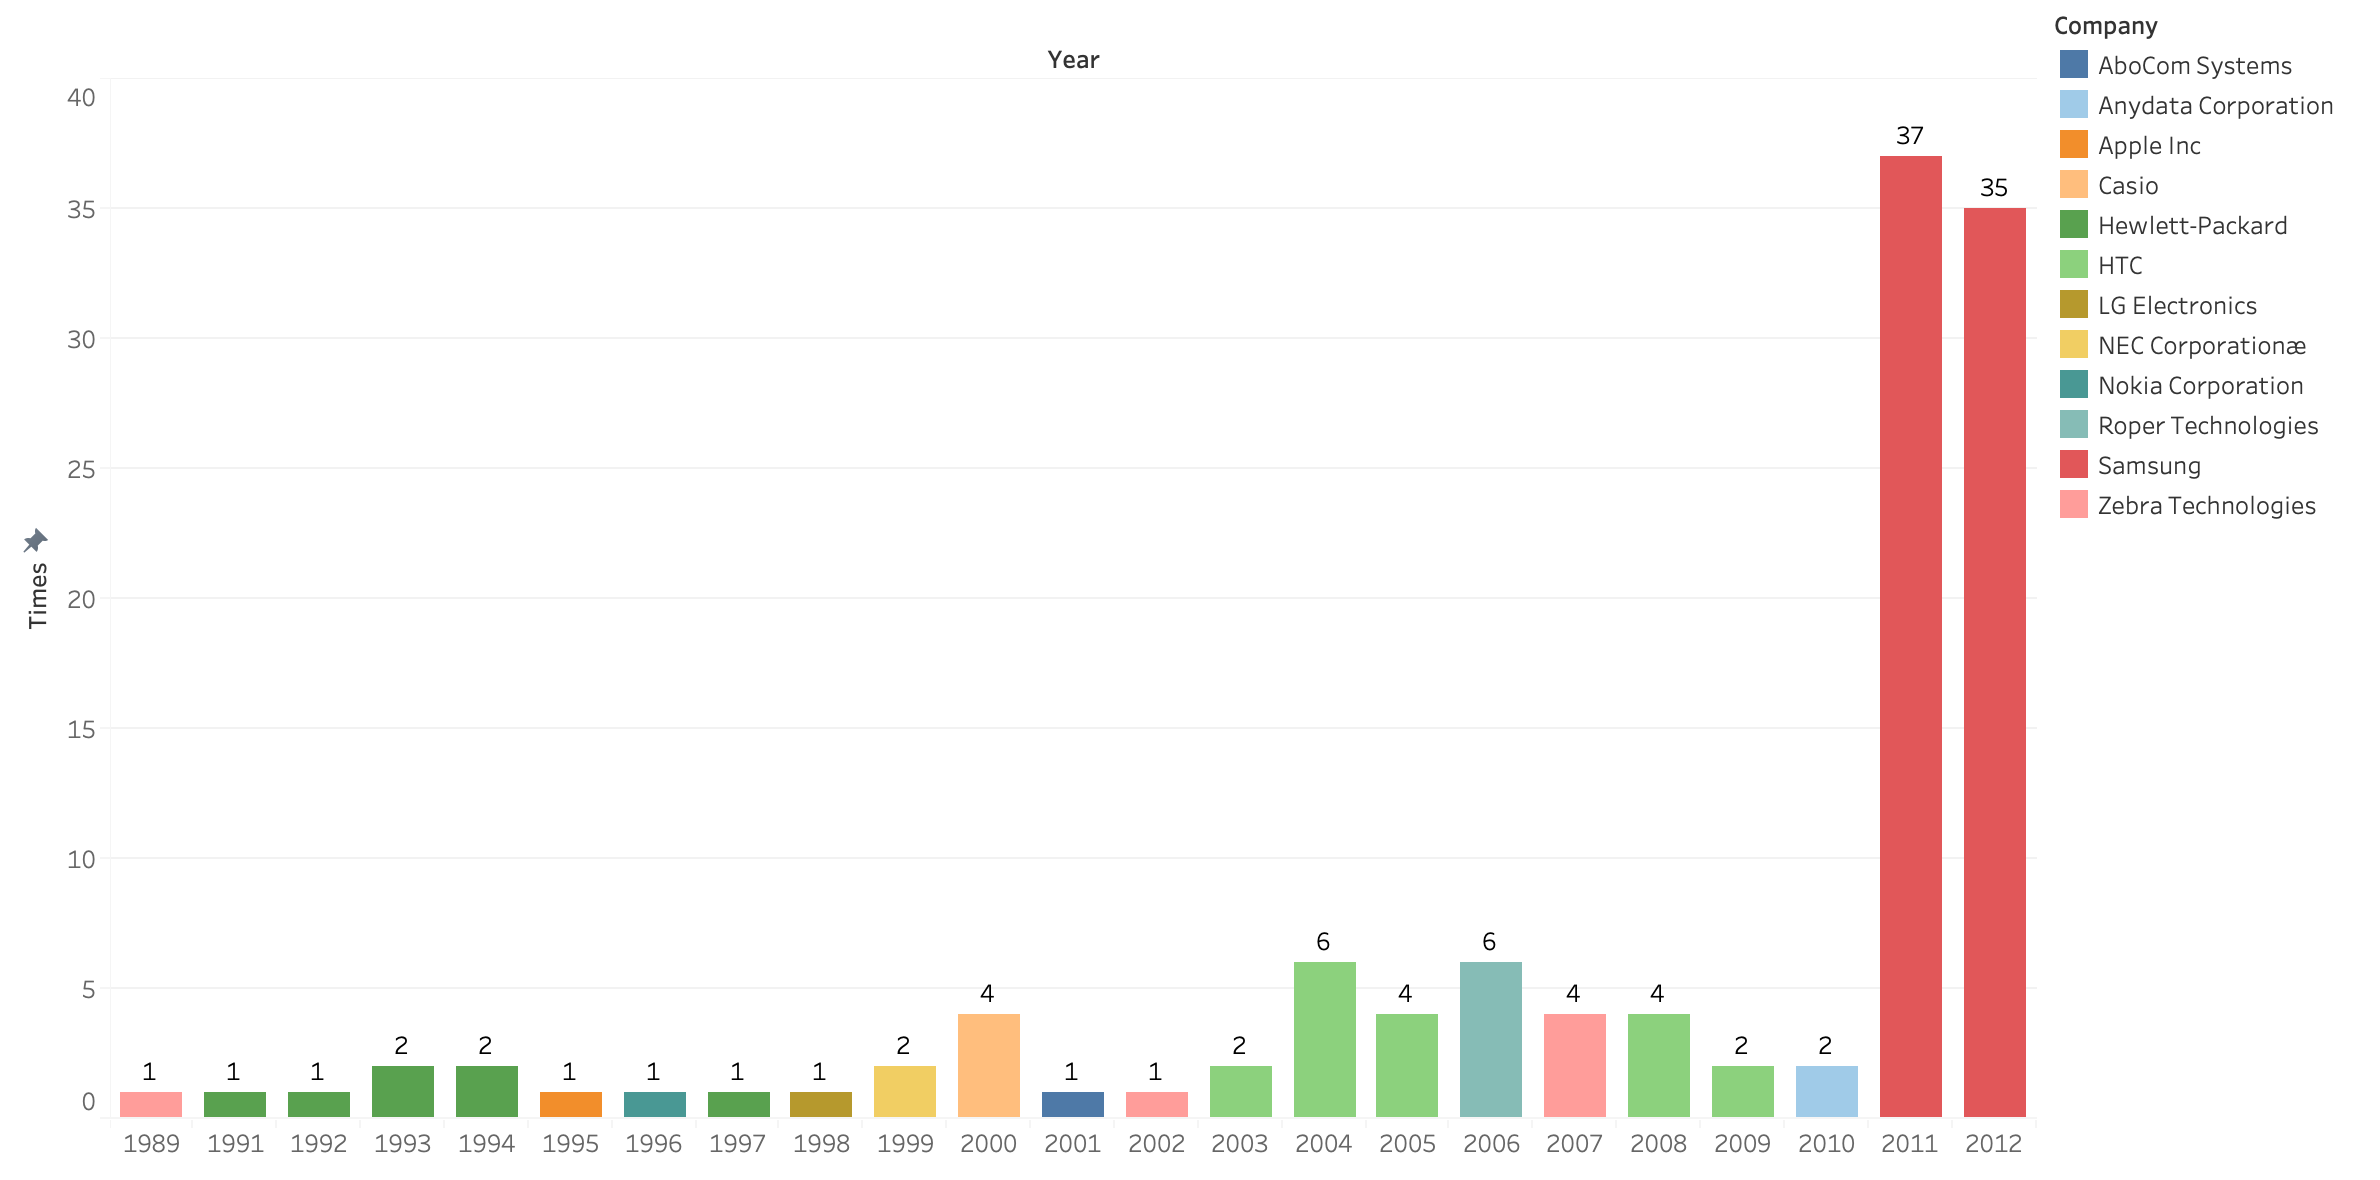

In [219]:
# CPU Clock (MHz)
def_clock = df_final[['Release Year', 'CPU Clock (MHz)', 'Company_real']]
def_clock_group = def_clock.groupby('Release Year')[['CPU Clock (MHz)','Company_real']].apply(lambda t: t[t['CPU Clock (MHz)']==t['CPU Clock (MHz)'].max()])
clock_list = [[index[0], row['CPU Clock (MHz)'], row['Company_real']] for index,row in def_clock_group.iterrows()]
def_clock_max = pd.DataFrame(clock_list,columns=['Year','CPU_Clock','Company'])

da_clock_select = def_clock_max[['Year','Company']]
year_list = list(set(list(da_clock_select['Year'])))
whole_result3=[]
for year in year_list:
    count_dict = dict(Counter(list(da_clock_select[da_clock_select['Year']==year].Company)))
    count_dict = sorted(count_dict.items(), key=lambda count_dict:count_dict[1], reverse=True)
    if len(count_dict)>=1:
        for row in count_dict[:1]:
            whole_result3.append([year,row[0],row[1]])
    else:
        for row in count_dict:
            whole_result3.append([year,row[0],row[1]])

df_result3 = pd.DataFrame(whole_result3,columns=['year','company','times'])
# df_result3.to_csv('for_show/result3.csv')


The problem of analyzing the CPU clock is transformed into a frequency problem. In the figure below, the x-axis is the quantity and the y-axis is the year, with the year increasing from top to bottom. The company's name is marked on the right side of the small circles, the color of the circle gradually darkens with the size of the number, and the size also changes with the number. The more the number, the larger the size and the darker the color. Between 1989 and 1999, both Apple Inc and Hewlett-Packard performed very well, and Apple Inc frequently launched high-CPU clock products slightly better. Between 2000 and 2010, there was no monopoly of ranking by a single company. Compa, Hewlett-Packard, HTC, Dell, Fujitsu Ltd, LG Electronics, Samsung, Acer and Motorola have all done things. But Hewlett-Packard's total number of times is the most. After 2010, Samsung was far ahead of Motorola. 

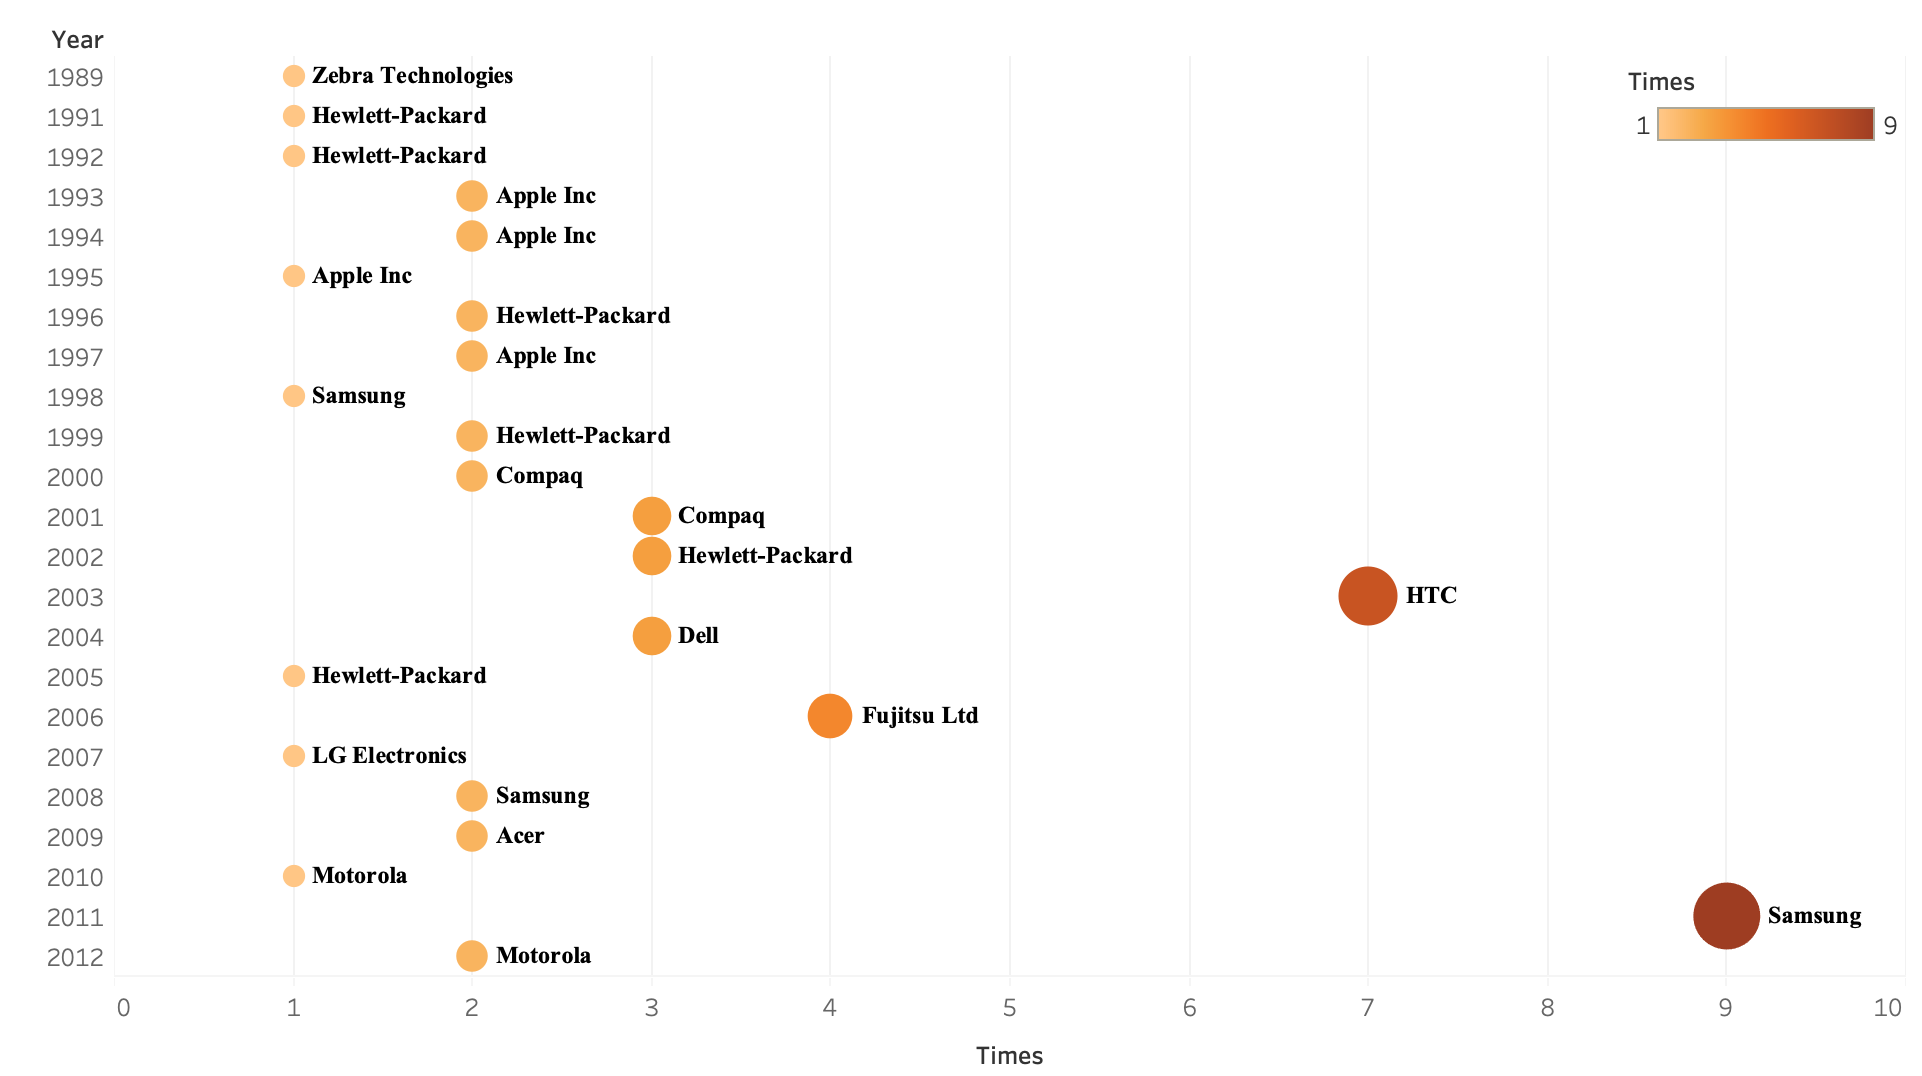

In [220]:
# Display Diagonal (in)
df_dia = df_final[['Release Year', 'Display Diagonal (in)', 'Company_real']]
df_dia_group = df_dia.groupby('Release Year')[['Display Diagonal (in)','Company_real']].apply(lambda t: t[t['Display Diagonal (in)']==t['Display Diagonal (in)'].max()])
dia_list = [[index[0], row['Display Diagonal (in)'], row['Company_real']] for index,row in df_dia_group.iterrows()]
df_dia_max = pd.DataFrame(dia_list,columns=['Year','Display_Diagonal','Company'])
df_dia_select = df_dia_max[['Year','Company']]
year_list = list(set(list(df_dia_select['Year'])))
whole_result4=[]
for year in year_list:
    count_dict = dict(Counter(list(df_dia_select[df_dia_select['Year']==year].Company)))
    count_dict = sorted(count_dict.items(), key=lambda count_dict:count_dict[1], reverse=True)
    if len(count_dict)>=1:
        for row in count_dict[:1]:
            whole_result4.append([year,row[0],row[1]])
    else:
        for row in count_dict:
            whole_result4.append([year,row[0],row[1]])

df_result4 = pd.DataFrame(whole_result4,columns=['year','company','times'])
df_result4.to_csv('for_show/result4.csv')


In terms of 'Display Diagonal', the distribution has a slight change. The x-axis represents the number of mobile devices with large screens, and the y-axis represents the year, increasing from top to bottom. The position of the yellow square represents the quantity, the more to the right, the more times. The names of the companies are marked on the right side of the small square. From 1989 to 1999, Hewlett-Packard was still a relatively good company, launching many mobile devices with larger screens. However, from 2000 to 2010, the number of releases including NEC Corporationæ, AboCom Systems, SiemensæAG, Zebra Technologies, Data Evolution Corp, Roper Technologies, Zebra Technologies, MiTAC International Cor and Inventec Corporation were almost the same. It is worth mentioning that MiTAC International Corp released four devices with larger screen sizes in 2009, which attracted attention. After 2010, Motorola and Toshiba ranked first with 6 and 2 times respectively.

4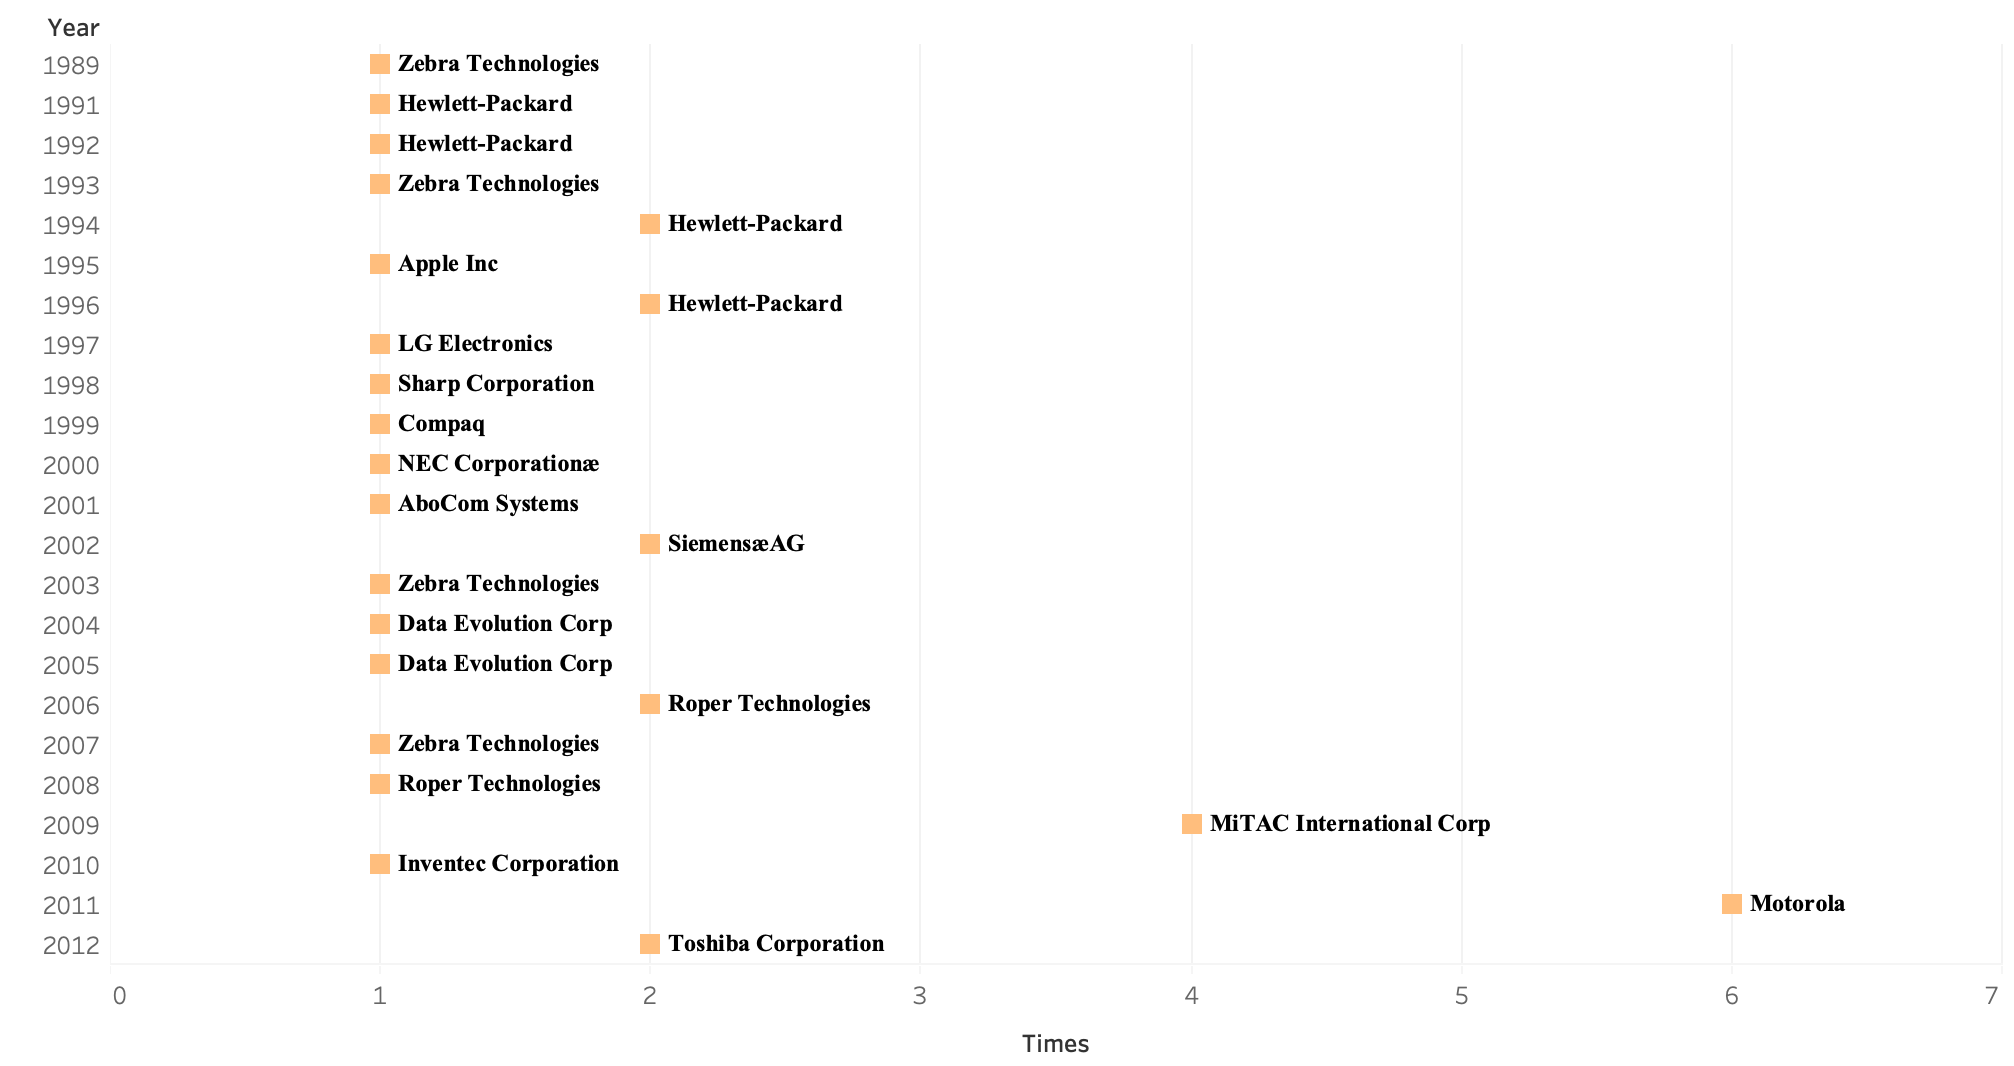

In [221]:
# Display Diagonal (in)
df_pix = df_final[['Release Year', 'Pixel Density (per inch)', 'Company_real']]
df_pix_group = df_pix.groupby('Release Year')[['Pixel Density (per inch)','Company_real']].apply(lambda t: t[t['Pixel Density (per inch)']==t['Pixel Density (per inch)'].max()])
pix_list = [[index[0], row['Pixel Density (per inch)'], row['Company_real']] for index,row in df_pix_group.iterrows()]
df_pix_max = pd.DataFrame(pix_list,columns=['Year','Pixel Density (per inch)','Company'])
df_pix_select = df_pix_max[['Year','Company']]
year_list = list(set(list(df_pix_select['Year'])))
whole_result5=[]
for year in year_list:
    count_dict = dict(Counter(list(df_pix_select[df_pix_select['Year']==year].Company)))
    count_dict = sorted(count_dict.items(), key=lambda count_dict:count_dict[1], reverse=True)
    if len(count_dict)>=1:
        for row in count_dict[:1]:
            whole_result5.append([year,row[0],row[1]])
    else:
        for row in count_dict:
            whole_result5.append([year,row[0],row[1]])

df_result5 = pd.DataFrame(whole_result5,columns=['year','company','times'])
df_result5.to_csv('for_show/result5.csv')

In terms of feature 'Pixel Density', The y-axis represents the year and the x-axis represents the number of times. The pink squares are distributed from left to right according to the number of times, and the company name is marked on the right side of the square. From 1989 to 1999, Hewlett-Packard ranked first. From 2000 to 2010, Casio, Nokia Corporation, Sharp Corporation, HTC, Motorola, Fujitsu Ltd, Mobile Compia, Apple Inc, TechFaith Wirelessæ, BlackBerry Limited and Sharp Corporation all launched high-resolution products. Verizon Communications and Asus ranked first in 2011 and 2012 respectively.

5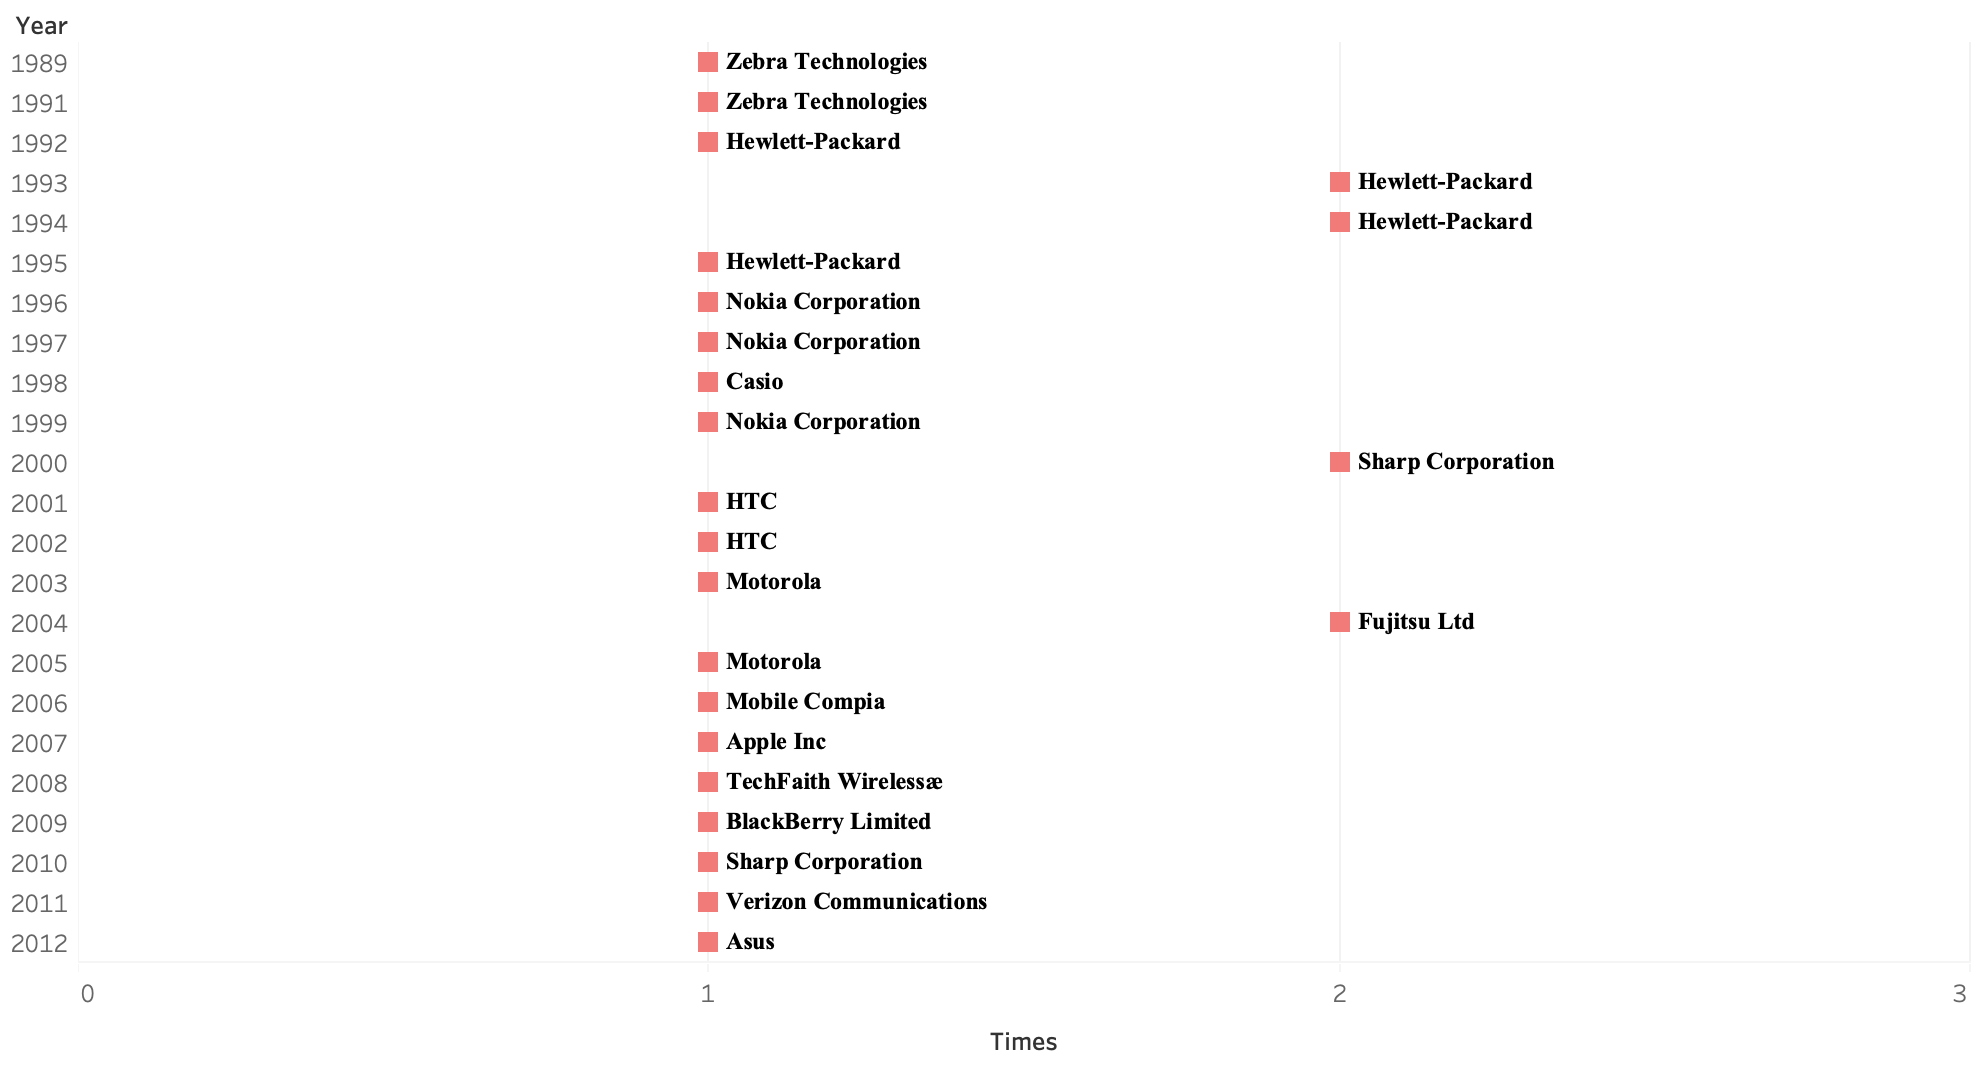

In order to make the analysis more comprehensive, we can not only analyze the dimensions alone, but also integrate these latitudes. Since these data are standardized according to characteristics, it is also meaningful. The numbers in each column can be understood as a ratio, so you can consider adding up the data for each latitude to form a new score. At this level, I do not intend to exclude other latitudes.

In [34]:
df_product_add = df_product[['Model', 'Release Year', 'RAM Capacity (Mb)', 'Storage (Mb)', 'CPU Clock (MHz)','Display Diagonal (in)', 'Display Width(px)', 'Display Length(px)','Width (mm)', 'Length (mm)', 'Depth (mm)', 'Volume (cubic cm)','Mass (grams)', 'Pixel Density (per inch)','Company_real']]
df_product_add.columns
df_product_add['Scores'] = df_product_add[['RAM Capacity (Mb)', 'Storage (Mb)', 'CPU Clock (MHz)','Display Diagonal (in)', 'Display Width(px)', 'Display Length(px)','Width (mm)', 'Length (mm)', 'Depth (mm)', 'Volume (cubic cm)','Mass (grams)', 'Pixel Density (per inch)']].apply(lambda x: x.sum(), axis=1)
df_scores = df_product_add[['Release Year','Company_real','Scores']]
df_scores_group = df_scores.groupby('Release Year')[['Scores','Company_real']].apply(lambda t: t[t['Scores']==t['Scores'].max()])
s_list = [[index[0], row['Scores'], row['Company_real']] for index,row in df_scores_group.iterrows()]
df_s_max = pd.DataFrame(s_list,columns=['Year','Scores','Company_real'])
df_s_select = df_s_max[['Year','Company_real']]
year_list = list(set(list(df_s_select['Year'])))
whole_results=[]
for year in year_list:
    count_dict = dict(Counter(list(df_s_select[df_s_select['Year']==year].Company_real)))
    count_dict = sorted(count_dict.items(), key=lambda count_dict:count_dict[1], reverse=True)
    if len(count_dict)>=1:
        for row in count_dict[:1]:
            whole_results.append([year,row[0],row[1]])
    else:
        for row in count_dict:
            whole_results.append([year,row[0],row[1]])

df_results = pd.DataFrame(whole_results,columns=['year','company','times'])
df_results.to_csv('for_show/result_S.csv')
# df_results



/Users/nexus/opt/anaconda3/envs/reco_base/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In the figure below, I set the x-axis to the number of times each company ranked first, and one scale represents one time. The y-axis is set to the company name, and each company corresponds to a different color. The year will be marked in text, which can clearly show which companies have performed well in the past few years. In this picture, Apple Inc, Hewlett-Packard, Roper Technologies and Zebra Technologies have been very good in the past few years, ranking first in the overall score rankings.

6-1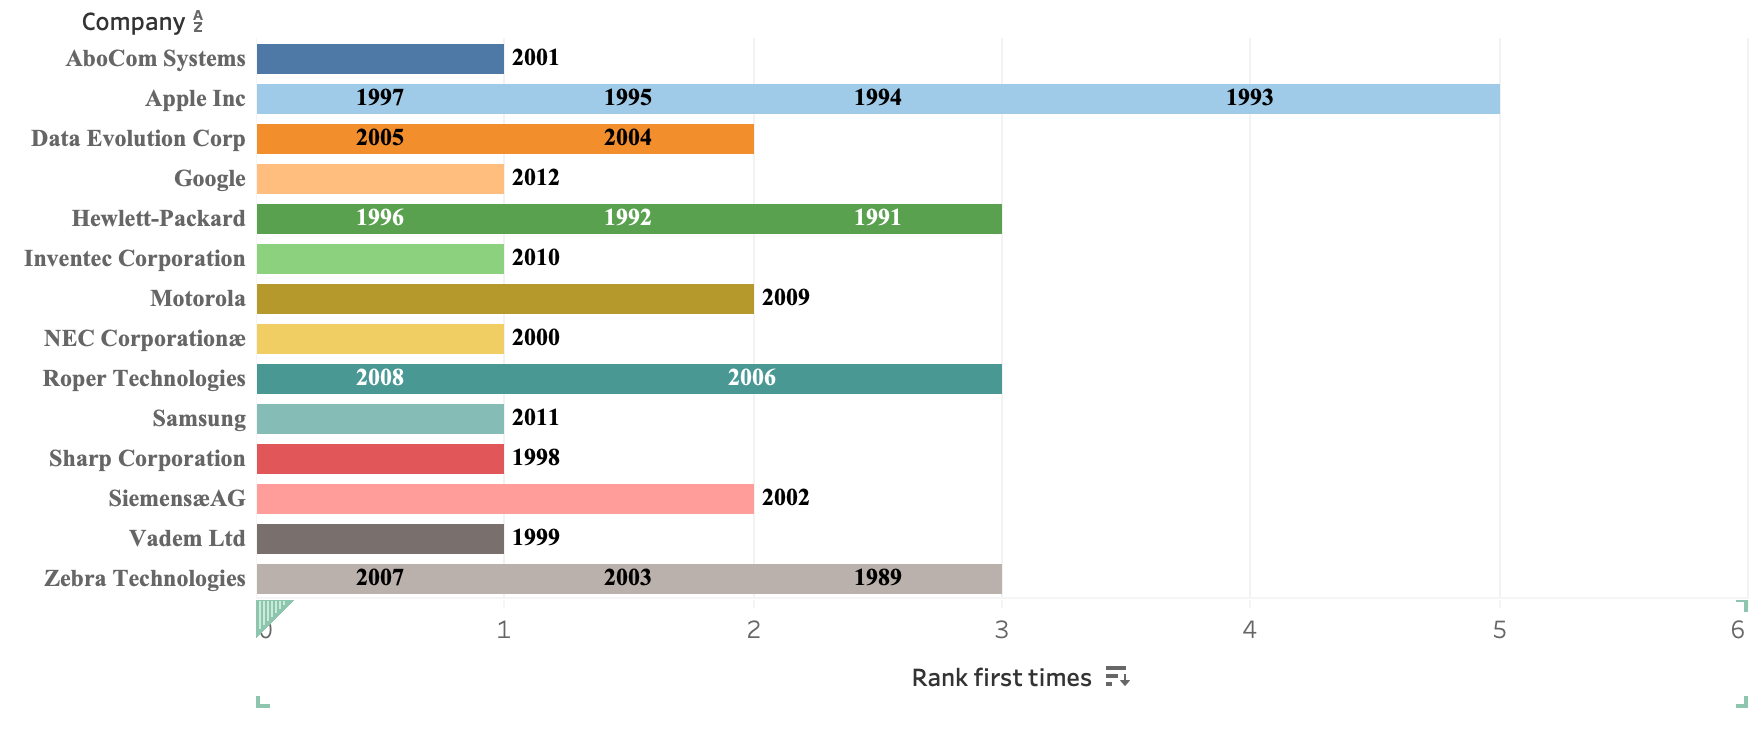

Taken together, from the perspective of the number of products released each year, Hewlett-Packard, HTC  and Samsung announced its ambitions to guide the market with an overwhelming number of products. From the perspective of RAM, Hewlett-Packard, HTC and Samsung led the market from 1989 to 1999, 2000 to 2010 and after 2021, respectively.  Apple Inc, Hewlett-Packard and Samsung were far ahead in terms of CPU clock. In terms of 'Display Diagonal', Hewlett-Packard, MiTAC International Corp and Motorola worked very well. In terms of feature 'Pixel Density', Hewlett-Packard, Sharp Corporation and Asus ranked first. From a comprehensive point of view, it is undoubtedly Apple Inc, Hewlett-Packard, Roper Technologies and Zebra Technologies tried to lead the market.